In [ ]:
!python --version

Python 3.7.12


# Loading Dataset and Libraries:

In [ ]:
from google.colab import files
uploaded = files.upload()
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import io


Saving FINAL COMMENTS.csv to FINAL COMMENTS (2).csv


In [ ]:
!pip install IMDbPY

In [ ]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import string
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
import nltk
from nltk.corpus import webtext
from nltk.probability import FreqDist
from sklearn import preprocessing
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.base import TransformerMixin 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
import math
from imdb import IMDb
import re

# Preprocessing:

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['FINAL COMMENTS.csv']))

In [ ]:
df.rename(columns = {'Movie Year': 'YearofRelease','Comment Title':'Gist','User Name':'UserName','Comment Date':'Date','Movie Name':'Name'},inplace=True)

In [ ]:
df.head(5)

,Gist,UserName,Name,YearofRelease,Date,Rating,Tone,Comment
0,"Amazing in 1997, 2005, 2015, 2030, 3010 & for...",katherinegranada995,Titanic,(1997),20 January 2015,10/10,positive,"You can watch this movie in 1997, you can watc..."
1,Why only a 7.8?\n,sander-vanluit,Titanic,(1997),13 July 2020,9/10,positive,There is no movie which made a bigger emotiona...
2,Titanic masterpiece: an emotional and visual ...,otr91,Titanic,(1997),31 August 2015,10/10,positive,Titanic is one of my all time favourite films....
3,Don't get the low rating\n,binchen-1985,Titanic,(1997),31 January 2021,10/10,positive,The low rating makes no sense to me at all... ...
4,This was one of the few movies that actually ...,rtivey913,Titanic,(1997),5 December 2014,10/10,positive,"Good Lord. This movie right here, it's a maste..."


In [ ]:
df.shape

(51109, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51109 entries, 0 to 51108
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gist           51109 non-null  object
 1   UserName       51109 non-null  object
 2   Name           51109 non-null  object
 3   YearofRelease  51109 non-null  object
 4   Date           51109 non-null  object
 5   Rating         47875 non-null  object
 6   Tone           47875 non-null  object
 7   Comment        51109 non-null  object
dtypes: object(8)
memory usage: 3.1+ MB


**Dropping Unwanted Columns and Null Values:**

In [ ]:
df.drop(['UserName'],axis=1,inplace=True)

In [ ]:
df.dropna(inplace=True)

**Label Encoding and column data manipulation:**

In [ ]:
le = preprocessing.LabelEncoder()
df['Tone']=le.fit_transform(df['Tone'])

In [ ]:
df["Rating"].replace({"1/10": "1", "2/10": "2","3/10":"3","4/10":"4","5/10":"5","6/10":"6","7/10":"7","8/10":"8","9/10":"9","10/10":"10"}, inplace=True)
df["Rating"] = pd.to_numeric(df["Rating"])

#Feature Engineering:

In [ ]:
nlp=English()
nltk.download('punkt')
nltk.download('stopwords')
stpwrds = list(STOP_WORDS)
punc = string.punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Feature extraction methods:

def count_chars(text):
  return len(text)

def count_words(text):
  return len(text.split())

def count_capital_chars(text):
    count=0
    for i in text:
        if i.isupper():
            count+=1
    return count

def count_capital_words(text):
    return sum(map(str.isupper,text.split()))

def count_punctuations(text):
    punctuations='!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~'
    d=dict()
    for i in punctuations:
        d[str(i)+' count']=text.count(i)
    return d 

def count_words_in_quotes(text):
    x = re.findall("'.'|\".\"", text)
    count=0
    if x is None:
        return 0
    else:
        for i in x:
            t=i[1:-1]
            count+=count_words(t)
        return count

def count_sent(text):
    return len(nltk.sent_tokenize(text))

def count_unique_words(text):
    return len(set(text.split()))

def count_stopwords(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)

In [ ]:
#Feature extraction

comment_array = np.array(df['Comment'])
char_count = 0
word_count = 0
capital_char_count = 0
capital_words_count = 0
word_in_quote_count = 0
sent_count = 0
unique_word_count = 0
stopword_count = 0

for i in comment_array:
  char_count += count_chars(i)
  word_count += count_words(i)
  capital_char_count += count_capital_chars(i)
  capital_words_count += count_capital_words(i)
  word_in_quote_count += count_words_in_quotes(i)
  sent_count += count_sent(i)
  unique_word_count += count_unique_words(i)
  stopword_count += count_stopwords(i)


In [ ]:
#Features of dataset
print('Average length of words: ', char_count/word_count)
print('Average length of sentences: ', word_count/sent_count)
print('Unique words vs word count feature: ', unique_word_count/word_count)
print('Stopwords count vs words counts feature: ', stopword_count/word_count)
print('Count of characters in the dataset: ', char_count)
print('Total count of words: ', word_count)
print('Words with capital letters: ', capital_char_count)
print('Total count of capital words : ', capital_words_count)
print('Total count of words enclosed in quotes: ', word_in_quote_count)
print('Total sentence count in the dataset: ', sent_count)
print('Total count of unique words in the dataset: ', unique_word_count)
print('Total count of stop words: ', stopword_count)

Average length of words:  5.5647507724273595
Average length of sentences:  18.77593493681815
Unique words vs word count feature:  0.6586401872275925
Stopwords count vs words counts feature:  0.4312215351470415
Count of characters in the dataset:  39209067
Total count of words:  7045970
Words with capital letters:  1185890
Total count of capital words :  173549
Total count of words enclosed in quotes:  340
Total sentence count in the dataset:  375266
Total count of unique words in the dataset:  4640759
Total count of stop words:  3038374


In [ ]:
#Tokenizer without feature engineering
def tokenizer_no_fe(s):
    mytokens = nlp(s)
    return mytokens

In [ ]:
#Custom tokenizer with feature engineering
def tokenizer(s):
    mytokens = nlp(s)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stpwrds and word not in punc ]
    return mytokens

In [ ]:
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        return [clean_text(text) for text in X]
    def fit(self, X, y, **fit_params):
        return self
    def get_params(self, deep=True):
        return {}
def clean_text(text):     
    return text.strip().lower()

In [ ]:
class DenseTransformer(TransformerMixin):

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()

In [ ]:
#Vectorizer without feature engineering
vectorizer_no_fe = CountVectorizer(tokenizer = tokenizer_no_fe, ngram_range=(1,1)) 

#Default vectorizer with feature engineering
tfvectorizer = TfidfVectorizer(tokenizer = tokenizer)

#Hypothesis Testing:

 **Influence of sentiment/tone on writing reviews:**

In [ ]:
df['Tone'].value_counts()

1    24438
0    23437
Name: Tone, dtype: int64

In [ ]:
df2=df.groupby('Name', as_index=False)['Rating'].mean()

In [ ]:
df2

,Name,Rating
0,3 Ninjas: High Noon at Mega Mountain,3.915254
1,Alone in the Dark,2.528958
2,Avengers: Endgame,7.996951
3,Avengers: Infinity War,8.175673
4,Baaghi 3,2.309829
5,Baby Geniuses,3.645161
6,Battlefield Earth,3.302235
7,Birdemic: Shock and Terror,3.546926
8,BloodRayne,3.271008
9,Bratz,5.076923


In [ ]:
goodmovies=[]
badmovies=[]
for ind in df2.index: 
  if df2['Rating'][ind]>4:
    goodmovies.append(df2['Name'][ind])
  else:
    badmovies.append(df2['Name'][ind])
gmcc=0
bmcc=0
for ind in df.index:
  if df['Name'][ind] in goodmovies:
    gmcc=gmcc+1
  else:
    bmcc=bmcc+1
print("Number of reviews for good movies:",gmcc);
print("Number of reviews for bad movies:",bmcc);

Number of reviews for good movies: 27967
Number of reviews for bad movies: 19908


In [ ]:
dfg=df[df.Name.isin(goodmovies)]
dfb=df[df.Name.isin(badmovies)]

In [ ]:
dfg['Name'].value_counts().mean()

1331.7619047619048

In [ ]:
dfb['Name'].value_counts().mean()

538.0540540540541

In [ ]:
dfgs=dfg.sample(10000)

In [ ]:
dfgs['Name'].value_counts().mean()

476.1904761904762

In [ ]:
dfgs['Name'].value_counts().std()

758.1310980989778

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


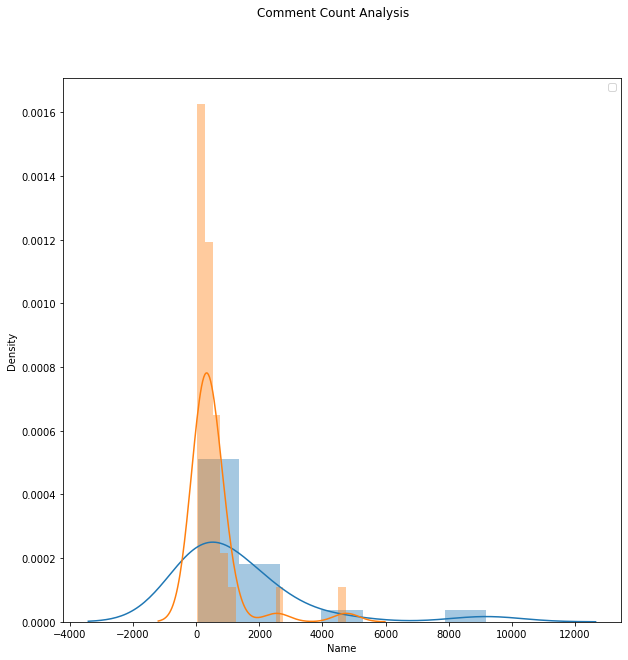

In [ ]:
fig = plt.figure(figsize = (10, 10))
sns.distplot(dfg['Name'].value_counts())
sns.distplot(dfb['Name'].value_counts())
plt.legend(loc='best')
fig.suptitle('Comment Count Analysis')
plt.show()

In [ ]:
def reviewsbytone():
    import numpy as np
    import scipy.stats
    #Initial variables here
    # ho:mu<=538 ; h1:mu>538
    n = 10000
    xbar = 476.19
    mu = 538
    s = 758.13
    alpha = 0.01
  
    #Fill in your code here
    t = (xbar-mu)/(s/np.sqrt(n))
    t_critical = scipy.stats.norm.ppf(1-.01)
    #Add your condition check
    if t>=t_critical:
      rejection=True
    else:
      rejection=False
   
    return rejection, t, t_critical

In [ ]:
reviewsbytone()

(False, -8.152955297904054, 2.326)

Here, we can infer that our null hypothesis is standing by inferring that number of reviews for bad movies is lower than that of good ones.

**Dividing the movies on the basis of its year of origin we try to compare the 90's movies with the early and current 20's movies respectively based on their ratings.**

In [ ]:
map_dict = {"(1964)": 1964,"(1966)": 1966,"(1987)": 1987,"(1988)": 1988,"(1989)": 1989,"(1990)": 1990,"(1996)": 1996,"(1997)": 1997,"(1998)": 1998,"(1999)": 1999,"(2000)": 2000,"(2001)": 2001,"(2002)": 2002,"(2003)": 2003,"(2004)": 2004,"(2005)": 2005,"(2006)": 2006,"(2007)": 2007,"(2008)": 2008,"(2009)": 2009,"(2010)": 2010,"(2012)": 2012,"(2013)": 2013,"(2014)": 2014,"(2015)": 2015,"(2016)": 2016,"(2018)": 2018,"(2019)": 2019,"(2020)": 2020,"(2021)": 2021,"(IV) (2020)": 2020}
df['YearofRelease'].replace(map_dict, inplace=True)

In [ ]:
df.groupby(['YearofRelease','Name'])['Rating'].count()

YearofRelease  Name                                       
1964           Santa Claus Conquers the Martians               208
1966           Manos: The Hands of Fate                        585
1987           Jaws: The Revenge                               377
1988           Hobgoblins                                      155
1989           Going Overboard                                 148
1990           Troll 2                                         426
1996           Kazaam                                           86
1997           Steel                                            55
               Titanic                                        2486
1998           3 Ninjas: High Noon at Mega Mountain             59
1999           Baby Geniuses                                   155
2000           Battlefield Earth                              1029
2001           Glitter                                         255
2002           Rollerball                                      222
   

In [ ]:
df.nunique()

Gist             40527
Name                58
YearofRelease       30
Date              6598
Rating              10
Tone                 2
Comment          47303
dtype: int64

In [ ]:
df.groupby('YearofRelease', as_index=False)['Rating'].count()

,YearofRelease,Rating
0,1964,208
1,1966,585
2,1987,377
3,1988,155
4,1989,148
5,1990,426
6,1996,86
7,1997,2541
8,1998,59
9,1999,155


In [ ]:
n = df.loc[df['YearofRelease'] < 2000]
n

,Gist,Name,YearofRelease,Date,Rating,Tone,Comment
0,"Amazing in 1997, 2005, 2015, 2030, 3010 & for...",Titanic,1997,20 January 2015,10.0,1,"You can watch this movie in 1997, you can watc..."
1,Why only a 7.8?\n,Titanic,1997,13 July 2020,9.0,1,There is no movie which made a bigger emotiona...
2,Titanic masterpiece: an emotional and visual ...,Titanic,1997,31 August 2015,10.0,1,Titanic is one of my all time favourite films....
3,Don't get the low rating\n,Titanic,1997,31 January 2021,10.0,1,The low rating makes no sense to me at all... ...
4,This was one of the few movies that actually ...,Titanic,1997,5 December 2014,10.0,1,"Good Lord. This movie right here, it's a maste..."
...,...,...,...,...,...,...,...
49298,WOW that wasn't good\n,3 Ninjas: High Noon at Mega Mountain,1998,25 January 2007,2.0,0,When I was younger when this movie was release...
49299,Wasn't that bad\n,3 Ninjas: High Noon at Mega Mountain,1998,27 November 2006,5.0,0,"At least the sequels weren't *that* bad, altho..."
49301,"Sweet, merciful Jesus, why?\n",3 Ninjas: High Noon at Mega Mountain,1998,8 August 2006,1.0,0,"Once I saw a movie review, where the reviewer ..."
49302,What?\n,3 Ninjas: High Noon at Mega Mountain,1998,14 July 2006,1.0,0,How could anyone possibly say anything bad abo...


In [ ]:
n['Rating'].mean()

5.332278481012659

In [ ]:
n['Rating'].std()

3.870821407032666

In [ ]:
t1 = df.loc[(df['YearofRelease'] >= 2000) & (df['YearofRelease'] <2011)]
t1.head()

,Gist,Name,YearofRelease,Date,Rating,Tone,Comment
14402,My Eyes!!!!\n,Disaster Movie,2008,28 August 2008,1.0,0,It's hard to imagine anyone writing a 'spoof' ...
14403,"The fact that aspiring actors, directors, and...",Disaster Movie,2008,28 August 2008,1.0,0,*Disclaimer: I only watched this movie as a co...
14404,There's just no point anymore\n,Disaster Movie,2008,29 August 2008,1.0,0,"Really, I could write a scathing review of thi..."
14405,Not Humorous...in the least bit\n,Disaster Movie,2008,28 August 2008,1.0,0,I am writing this in hopes that this gets put ...
14406,"Awful, pure stupidity\n",Disaster Movie,2008,29 August 2008,1.0,0,This movie I saw a day early for free and I st...


Taking a sample of 500 movies from the early 20's

In [ ]:
t12 = t1.sample(n=500)
t12

,Gist,Name,YearofRelease,Date,Rating,Tone,Comment
35023,Epic Fail\n,Epic Movie,2007,15 June 2008,1.0,0,Please disregard the one star on this review. ...
25166,"""Not so"" Amazing Spider-Man\n",Spider-Man,2002,26 October 2003,7.0,1,The first half of the movie was very good. Why...
24745,See this movie\n,Spider-Man,2002,7 May 2002,9.0,1,"See this movie, see it now. You will not be di..."
34621,"you are all too cruel, this is a fun movie\n",Alone in the Dark,2005,6 April 2006,7.0,1,It is amazing how many people don't like this ...
24114,"""Does Whatever a Spider Can"", A spider can do...",Spider-Man,2002,25 July 2002,10.0,1,"This movie is outstanding, I saw it the first ..."
...,...,...,...,...,...,...,...
35121,You should know what this is!\n,Epic Movie,2007,22 July 2018,3.0,0,Let's star off by telling you what this movie ...
34091,A struggling singer realizes her dream of bec...,Glitter,2001,12 September 2002,1.0,0,I watcheed this film when I was in the hospita...
35227,Do. Not. Watch. Ever.\n,Epic Movie,2007,30 January 2008,1.0,0,"I'll be honest, I did not see the entire movie..."
24664,Should Have Let James Cameron Direct it...\n,Spider-Man,2002,4 May 2002,3.0,0,This movie starts out great but loses a lot of...


In [ ]:
t12['Rating'].mean()

3.77

z-test using critical value

In [ ]:
import math
from math import sqrt
import scipy.stats
from scipy.stats import norm
import scipy.stats
import numpy as np
def yor():
    #Hypothesis 
    # H0: mu <= 5.33 ; Ha: mu > 5.33
    
    n = 500
    xbar = 3.77
    mu = 5.33
    sigma = 3.87
    alpha = 0.05
    
    z = (xbar - mu) / (sigma/np.sqrt(n))
    z_critical = scipy.stats.norm.ppf(1-.05)
    
    
    if(z < z_critical):
        rejection = False 
    else:
        rejection = True
        
    return rejection, z, z_critical

In [ ]:
yor()

(False, -9.013607351161944, 1.6448536269514722)

Here we can infer that our null hypothesis is standing by infering 90's has lower rating compared to early 20's films

In [ ]:
t2 = df.loc[(df['YearofRelease'] >= 2011)]
t2.head()

,Gist,Name,YearofRelease,Date,Rating,Tone,Comment
3032,"Great action, cool visuals and that's about i...",Godzilla vs. Kong,2021,3 April 2021,7.0,1,I am glad I watched this film for 3 reasons: 1...
3033,Am i the only one who thought this was overhy...,Godzilla vs. Kong,2021,26 March 2021,6.0,1,"I liked the action but once again, The story a..."
3034,Thank goodness for the children.\n,Godzilla vs. Kong,2021,4 April 2021,5.0,0,This is another movie where children save the ...
3035,Great CGI can't compensate for awful story.\n,Godzilla vs. Kong,2021,2 April 2021,5.0,0,"This is a mindless, plotless action flick with..."
3036,Epic battles with an uninspired plot.\n,Godzilla vs. Kong,2021,1 April 2021,7.0,1,Rating basically for the epic battles in this ...


In [ ]:
t2['Rating'].mean()

5.762435085402095

In [ ]:
t2['Rating'].std()

3.8249942365648106

Null Hypothesis here is that the current 20's movies have higher rating compared to the early 20's and the alternate is that current 20's has the lowest rating

In [ ]:
def yor1():
    #Hypothesis 
    # H0: mu >= 5.76 ; Ha: mu < 5.76
    
    n = 500
    xbar = 3.77
    mu = 5.76
    sigma = 3.82
    alpha = 0.05
    
    z = (xbar - mu) / (sigma/np.sqrt(n))
    z_critical = scipy.stats.norm.ppf(.05)
    
    
    if(z < z_critical):
        rejection = False 
    else:
        rejection = True
        
    return rejection, z, z_critical

In [ ]:
yor1()

(False, -11.648626374933459, -1.6448536269514729)

In [ ]:
from scipy import stats
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import ztest
def ZTest(x1,value):

    z_value , p_value = ztest(x1 = x1,value =value )
    
    print('Z-score is :{}\n'.format(z_value))
    print('P-value is :{:.7f}\n'.format(p_value))
    
    if p_value<0.05:
      print('Null Hypothesis Rejected\n')
    else:
      print('Null Hypothesis is not Rejected\n')

In [ ]:
ZTest(t12['Rating'],t2['Rating'].mean())

Z-score is :-11.001543640086936

P-value is :0.0000000

Null Hypothesis Rejected



Here we can infer that our null hypothesis is not standing as the later 20's movies are having much higher ratings compared to the early 20's

**To compare good film with bad based on their standard deviation**

In [ ]:
good=rate[(rate.Rating)>=4]
good

,Name,Rating
2,Avengers: Endgame,7.996951
3,Avengers: Infinity War,8.175673
9,Bratz,5.076923
11,Cats,4.728496
13,Dabangg 3,4.577570
19,Far Cry,4.370787
21,From Justin to Kelly,4.195312
23,Glitter,5.407843
24,Godzilla vs. Kong,6.955034
30,Iron Man 3,6.145137


In [ ]:
bad=rate[(rate.Rating)<4]
bad

,Name,Rating
0,3 Ninjas: High Noon at Mega Mountain,3.915254
1,Alone in the Dark,2.528958
4,Baaghi 3,2.309829
5,Baby Geniuses,3.645161
6,Battlefield Earth,3.302235
7,Birdemic: Shock and Terror,3.546926
8,BloodRayne,3.271008
10,Breach,2.106944
12,Code Name: K.O.Z.,2.588235
14,Daniel the Wizard,2.733333


In [ ]:
good.shape

(21, 2)

In [ ]:
bad.shape

(37, 2)

In [ ]:
good.std().mean()

1.567049628778525

In [ ]:
bad.std().mean()

0.6471144954568712

**Taking sample of 10 from bad movies**

In [ ]:
b_sample=bad.sample(10)
b_sample

,Name,Rating
40,Rollerball,3.135135
18,Epic Movie,2.662261
14,Daniel the Wizard,2.733333
33,Kirk Cameron's Saving Christmas,3.269663
48,Tees Maar Khan,2.626087
51,The Human Centipede III (Final Sequence),3.409722
20,Foodfight!,2.266667
42,Smolensk,1.336667
7,Birdemic: Shock and Terror,3.546926
1,Alone in the Dark,2.528958


In [ ]:
b_sample.std().mean()

0.6491011650325672

In [ ]:
good.std()

Rating    1.56705
dtype: float64

In [ ]:
b_sample.std()

Rating    0.649101
dtype: float64

**Chi-Square**

In [ ]:
import numpy as np
from scipy.stats import norm
import scipy.stats
from math import sqrt

In [ ]:
def chi_square():

    # H1.56 ; H1:sigma!=1.56 H0:sigma=(std deviation of good movies) (Two-tailed)
    
    n = 10
    degrees_of_freedom = 9
    s = 0.64
    sigma = 1.56
    alpha = 0.01
  
    chi_square=((n-1)*(s ** 2))/(sigma ** 2)
    critical=scipy.stats.chi2.ppf(1-0.01,df=9)
    if(critical > alpha): 
        rejection = False 
    else:
        rejection = True
        
    return rejection, chi_square, critical

In [ ]:
chi_square()

(False, 1.514792899408284, 21.665994333461924)

**INFERENCE:**   

**Here, we can infer that our null hypothesis is standing by having higher standard deviation for good film compared to the bad film** 

**To compare positive movies with bad based on their length of the comments**

In [ ]:
df_pos=df[(df.Tone==1)]

In [ ]:
df_neg=df[(df.Tone==0)]

In [ ]:
df_pos.std().mean()

0.6711322019631337

In [ ]:
df_neg.std().mean()

0.627535215418371

**Taking sample of *25* from negative movies**

In [ ]:
df_neg_sample=df_neg.sample(25)

In [ ]:
df_comment_len=df_pos['Comment'].str.len()

In [ ]:
df_comment_len.mean()

880.1144938210983

In [ ]:
df_comment_len1=df_neg_sample['Comment'].str.len()

In [ ]:
df_comment_len1.mean()

748.8

In [ ]:
df_comment_len1.std()

1006.008159343982

**T-test using P-value**

In [ ]:
def t_test():
    # H0: mu>=880.11 ; Ha: mu<880.11 (right-tailed)
    
    n = 25
    xbar = 748.8
    mu = 880.11
    sigma = 1006
    alpha = 0.05
    
    t = (xbar-mu)/(sigma/np.sqrt(n))
    p = scipy.stats.norm.sf(abs(t),n-1)*2
    
    if(p > alpha): 
        rejection = False 
    else:
        rejection = True
        
    return rejection,t,p

In [ ]:
t_test()

(False, -0.6526341948310143, 0.513992135219874)

**INFERENCE:**   

**Here, we can infer that our null hypothesis is standing by having higher length of comments for good film compared to the bad film** 

#Training and Comparison of Models:

In [ ]:
X = df['Comment']
y = df['Tone']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# **Logistic Regression:**

**Without Feature Engineering**

In [ ]:
# Logistic regression without feature engineering

linear_regression_classifier = LogisticRegression(solver='lbfgs', max_iter=100000)
LRmodel = Pipeline([("cleaner", predictors()),
                 ('vectorizer', vectorizer_no_fe),
                 ('classifier', linear_regression_classifier)])

# Train the Model using Logistic regression
LRmodel.fit(X_train,y_train)   
LRpred = LRmodel.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,LRpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,LRpred)}')
print(f'Accuracy: {accuracy_score(y_test,LRpred)*100}%')

Confusion Matrix:
[[4711    0]
 [4864    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      1.00      0.66      4711
           1       0.00      0.00      0.00      4864

    accuracy                           0.49      9575
   macro avg       0.25      0.50      0.33      9575
weighted avg       0.24      0.49      0.32      9575

Accuracy: 49.20104438642298%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!pip install scikit-plot

**With Feature Engineering**

In [ ]:
# Logistic regression with feature engineering
import scikitplot as skplt
from sklearn.metrics import r2_score
from sklearn import metrics
import matplotlib.pyplot as plt
linear_regression_classifier = LogisticRegression(solver='lbfgs', max_iter=100000)
LRmodel = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfvectorizer),
                 ('classifier', linear_regression_classifier)])

LRmodel.fit(X_train,y_train)   
LRpred = LRmodel.predict(X_test)

Confusion Matrix:
[[4136  575]
 [ 552 4312]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4711
           1       0.88      0.89      0.88      4864

    accuracy                           0.88      9575
   macro avg       0.88      0.88      0.88      9575
weighted avg       0.88      0.88      0.88      9575

Accuracy: 88.22976501305483%


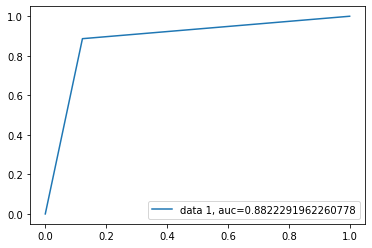

In [ ]:
print(f'Confusion Matrix:\n{confusion_matrix(y_test,LRpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,LRpred)}')
print(f'Accuracy: {accuracy_score(y_test,LRpred)*100}%')
fpr, tpr, _ = metrics.roc_curve(y_test,LRpred)
auc = metrics.roc_auc_score(y_test,LRpred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**Comparison with Other Models**

#**Decision Tree Classifier model:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier()
DTmodel = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfvectorizer),
                 ('classifier', DTclassifier)])

# Train the Model
DTmodel.fit(X_train,y_train)   
DTpred = DTmodel.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,DTpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,DTpred)}')
print(f'Accuracy: {accuracy_score(y_test,DTpred)*100}%')

Confusion Matrix:
[[3567 1144]
 [ 979 3885]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      4711
           1       0.77      0.80      0.79      4864

    accuracy                           0.78      9575
   macro avg       0.78      0.78      0.78      9575
weighted avg       0.78      0.78      0.78      9575

Accuracy: 77.82767624020887%


#**SVM Classifier model:**

In [ ]:
SVCclassifier = LinearSVC()
SVCmodel = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfvectorizer),
                 ('classifier', SVCclassifier)])

# Train the Model
SVCmodel.fit(X_train,y_train)   
SVCpred = SVCmodel.predict(X_test)
print(f'Confusion Matrix:\n{confusion_matrix(y_test,SVCpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,SVCpred)}')
print(f'Accuracy: {accuracy_score(y_test,SVCpred)*100}%')

Confusion Matrix:
[[4117  594]
 [ 564 4300]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4711
           1       0.88      0.88      0.88      4864

    accuracy                           0.88      9575
   macro avg       0.88      0.88      0.88      9575
weighted avg       0.88      0.88      0.88      9575

Accuracy: 87.90600522193212%


#**Random Forest Classifier model:**

In [ ]:
random_classifier = RandomForestClassifier(n_estimators=100, max_depth=3,max_features='auto', min_samples_leaf=4,bootstrap=True, n_jobs=-1,random_state=0)
RFModel = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfvectorizer),
                 ('classifier', random_classifier)])
RFModel.fit(X_train,y_train)   

Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7fe6486f2d50>),
                ('vectorizer',
                 TfidfVectorizer(tokenizer=<function tokenizer at 0x7fe6ef1f8c20>)),
                ('classifier',
                 RandomForestClassifier(max_depth=3, min_samples_leaf=4,
                                        n_jobs=-1, random_state=0))])

In [ ]:
RFpred = RFModel.predict(X_test)

Confusion Matrix:
[[3094 1617]
 [ 604 4260]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      4711
           1       0.72      0.88      0.79      4864

    accuracy                           0.77      9575
   macro avg       0.78      0.77      0.76      9575
weighted avg       0.78      0.77      0.77      9575

Accuracy: 76.80417754569191%
F1 score: [0.73587823 0.79322223]


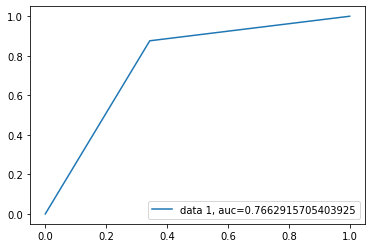

In [ ]:
from sklearn.metrics import f1_score
from sklearn import metrics
print(f'Confusion Matrix:\n{confusion_matrix(y_test,RFpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,RFpred)}')
print(f'Accuracy: {accuracy_score(y_test,RFpred)*100}%')
print(f'F1 score: {f1_score(y_test,RFpred,average=None)}')
fpr, tpr, _ = metrics.roc_curve(y_test,RFpred)
auc = metrics.roc_auc_score(y_test,RFpred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


#**Gaussian NB model:**

In [ ]:
nb_classifier = GaussianNB()
NBmodel = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfvectorizer),
                 ('to_dense', DenseTransformer()),
                 ('classifier', nb_classifier)])

NBmodel.fit(X_train,y_train)   
NBpred = NBmodel.predict(X_test)

In [ ]:
print(f'Confusion Matrix:\n{confusion_matrix(y_test,NBpred)}')
print(f'\nClassification Report:\n{classification_report(y_test,NBpred)}')
print(f'Accuracy: {accuracy_score(y_test,NBpred)*100}%')
fpr, tpr, thresholds = roc_curve(y_test, NBpred)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)

#**XGBoost model:**

In [ ]:
from xgboost import XGBClassifier
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)
XGmodel = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfvectorizer),
                 ('to_dense', DenseTransformer()),
                 ('classifier', nb_classifier)])
XGModel.fit(X_train, y_train)
xgb = model_bow.predict_proba(X_test)

In [ ]:
print(f'Confusion Matrix:\n{confusion_matrix(y_test,xgb)}')
print(f'\nClassification Report:\n{classification_report(y_test,xgb)}')
print(f'Accuracy: {accuracy_score(y_test,xgb)*100}%')
print(f'F1 score: {f1_score(y_test,xgb,average=None)}')

**Comparing all model outputs**

In [ ]:
#testing a comment using logistic regression model
pre = LRmodel.predict(["The movie was very very bad I couldn't watch it at all"])
print(f'Prediction: {pre[0]}')
pre = LRmodel.predict(["The movie was amazing and I really loved it"])
print(f'Prediction: {pre[0]}')

Prediction: 0
Prediction: 1


In [ ]:
#testing a comment using random forest regression model
pre = RFModel.predict(["The movie was very very bad I couldn't watch it at all"])
print(f'Prediction: {pre[0]}')
pre = RFModel.predict(["The movie was amazing and I really loved it"])
print(f'Prediction: {pre[0]}')

Prediction: 0
Prediction: 1


In [ ]:
#testing a comment using SVM model
pre = SVCmodel.predict(["The movie was very very bad I couldn't watch it at all"])
print(f'Prediction: {pre[0]}')
pre = SVCmodel.predict(["The movie was amazing and I really loved it"])
print(f'Prediction: {pre[0]}')

Prediction: 0
Prediction: 1


In [ ]:
#testing a comment using Decision Tree model
pre = DTmodel.predict(["The movie was very very bad I couldn't watch it at all"])
print(f'Prediction: {pre[0]}')
pre = DTmodel.predict(["The movie was amazing and I really loved it"])
print(f'Prediction: {pre[0]}')

Prediction: 0
Prediction: 1


# Conclusions
We consider **accuracy** as our evaluation metrics because we wish to see the general performance of the models. And we can confidently use accuracy score because we have dealt with the imbalance in the dataset.

We can see that the accuracy of **Logistic Regression** is considerably higher than the other models. So we choose logistic regression as our final model to make predictions. 




## **Getting and Processing Comments with the best MODEL:**

In [ ]:
def getIMDbComments(movie_name):
    ia = IMDb()
    comments = []

    search = ia.search_movie(movie_name)

    if not search:
      print('\nMovie not found!')
      return None

    count = 0
    print('\nSelect your choice of movie from the below options: ')
    
    for i in search: 
      print(str(count) + '. ', i['title'])
      count = count + 1

    choice_of_movie = abs(int(input('\nEnter your coice: ')))

    if(choice_of_movie > len(search)):
      print('\nInvalid choice!')
      return None

    print('\nYou chose option', str(choice_of_movie) + ', ', 'Movie name:',search[choice_of_movie]['title'] )
    id = search[choice_of_movie].movieID

    try:
      movie_info = ia.get_movie(id, ['reviews'])

      for i in movie_info['reviews']:
          comments.append(i['content'])

      return comments

    except:
      print('Sorry, no reviews were found for the chosen movie')
      return None


In [ ]:
#Get comments from IMDB and generate comment tone statistics

movie_name = str(input("Enter movie name: "))
movie_name = movie_name.replace(" ", "_")
movie_name = movie_name.lower()
comments = []

print('Fetching movie information for', movie_name ,'...')
commentList = getIMDbComments(movie_name)
if(commentList):
  comments += commentList
  predictedComment = LRmodel.predict(comments)
  
  count_0 = 0
  count_1 = 0

  for i in predictedComment:
    if(i == 0):
      count_0 += 1

    else:
      count_1 += 1
  
  print('\nComment statistics:')
  print('Positive Comments: ', str(get_percentage(count_1, len(predictedComment))) + '%, ', 'Negative Comments: ', str(get_percentage(count_0, len(predictedComment))) + '%') 
  if(count_1 >= count_0):
    print('Prediction says that this is a good film')

  else:
    print('Prediction says that this is a bad film')

  print('Overall score: {}/10'.format(int(math.ceil(get_percentage(count_1, len(predictedComment))/10))))


Enter movie name: titanic
Fetching movie information for titanic ...

Select your choice of movie from the below options: 
0.  Titanic
1.  A Night to Remember
2.  Titanic
3.  Titanic II
4.  Titanic
5.  Titanic
6.  Raise the Titanic
7.  Titanic: Deleted Scenes
8.  Titane
9.  Titans
10.  Attack on Titan
11.  The Titan
12.  Clash of the Titans
13.  Remember the Titans
14.  Titanic
15.  Wrath of the Titans
16.  Clash of the Titans
17.  The Mauritanian
18.  Titanic 2
19.  Titans

Enter your coice: 0

You chose option 0,  Movie name: Titanic

Comment statistics:
Positive Comments:  92.0%,  Negative Comments:  8.0%
Prediction says that this is a good film
Overall score: 10/10


In [ ]:
def get_percentage(val, total):
  return (val * 100)/total